In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the datasets

books = pd.read_csv('data/Books.csv')
users = pd.read_csv('data/Users.csv')
ratings = pd.read_csv('data/Ratings.csv')

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [7]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [8]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [9]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [10]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [12]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [13]:
missing_percentage = users['Age'].isnull().mean() * 100
print(f"Missing Age Percentage: {missing_percentage:.2f}%")


Missing Age Percentage: 39.72%


In [14]:
users['Age'].value_counts(normalize=True)


Age
24.0     0.033832
25.0     0.033421
26.0     0.032999
23.0     0.032458
27.0     0.032023
           ...   
168.0    0.000006
132.0    0.000006
159.0    0.000006
186.0    0.000006
127.0    0.000006
Name: proportion, Length: 165, dtype: float64

In [15]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [16]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [17]:
books.duplicated().sum()

0

In [18]:
users.duplicated().sum()

0

In [19]:
ratings.duplicated().sum()

0

In [20]:
# handling missing values:

In [21]:
books.dropna(inplace=True)

In [22]:
books.shape

(271353, 8)

In [23]:
# EDA

In [24]:
# Display basic information about the datasets
print("Books Dataset:")
print(books.info())
print("\nUsers Dataset:")
print(users.info())
print("\nRatings Dataset:")
print(ratings.info())


Books Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 271353 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271353 non-null  object
 1   Book-Title           271353 non-null  object
 2   Book-Author          271353 non-null  object
 3   Year-Of-Publication  271353 non-null  object
 4   Publisher            271353 non-null  object
 5   Image-URL-S          271353 non-null  object
 6   Image-URL-M          271353 non-null  object
 7   Image-URL-L          271353 non-null  object
dtypes: object(8)
memory usage: 18.6+ MB
None

Users Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: 

In [25]:
# Summary statistics
print("\nBooks Dataset Summary:")
print(books.describe(include='all'))

print("\nUsers Dataset Summary:")
print(users.describe(include='all'))

print("\nRatings Dataset Summary:")
print(ratings.describe())



Books Dataset Summary:
              ISBN      Book-Title      Book-Author  Year-Of-Publication  \
count       271353          271353           271353               271353   
unique      271353          242129           102019                  200   
top     0195153448  Selected Poems  Agatha Christie                 2002   
freq             1              27              632                13902   

        Publisher                                        Image-URL-S  \
count      271353                                             271353   
unique      16803                                             271037   
top     Harlequin  http://images.amazon.com/images/P/039450691X.0...   
freq         7535                                                  2   

                                              Image-URL-M  \
count                                              271353   
unique                                             271037   
top     http://images.amazon.com/images/P/039450691

In [26]:
# -------------------- Books Data Analysis --------------------

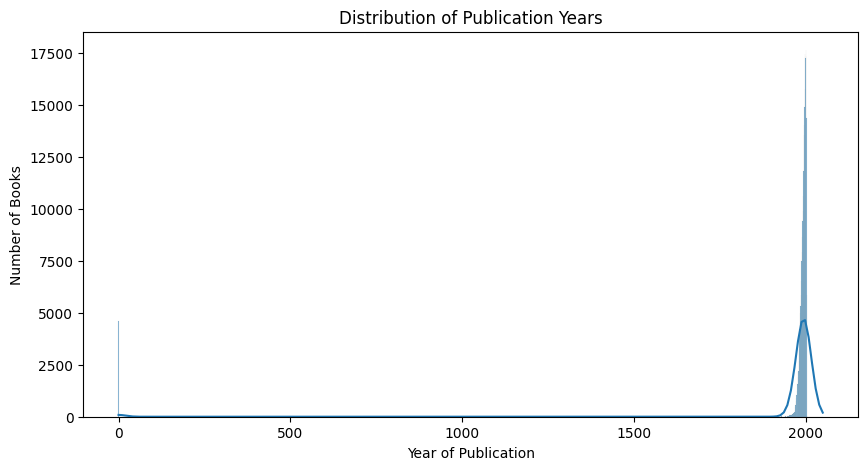

In [27]:
# Publication Year Distribution
plt.figure(figsize=(10,5))
sns.histplot(books["Year-Of-Publication"], bins=20, kde=True)
plt.title("Distribution of Publication Years")
plt.xlabel("Year of Publication")
plt.ylabel("Number of Books")
plt.show()

In [28]:
pd.crosstab(books['Year-Of-Publication'], columns='count').sort_values(by='count', ascending=False).head(10)

col_0,count
Year-Of-Publication,
2002,13902
2001,13714
1999,13413
2000,13373
1998,12116
2003,11610
1997,11494
1996,10687
1995,10258


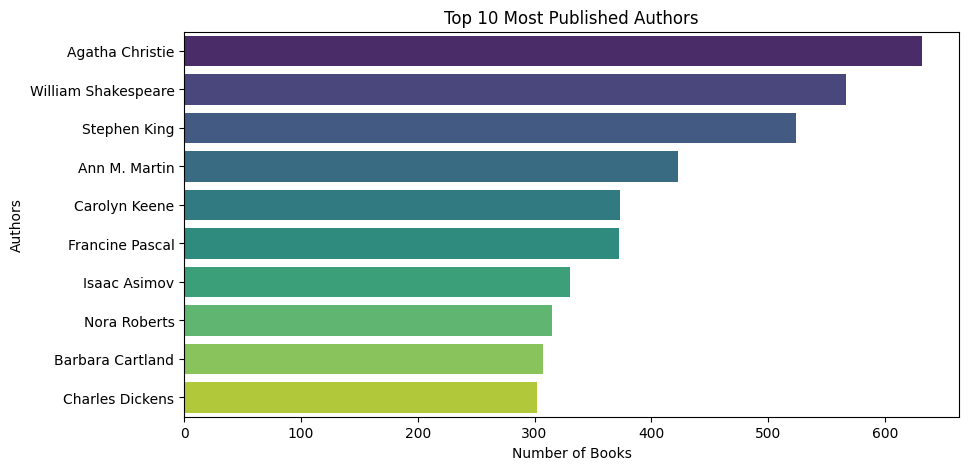

In [29]:
# Most common authors
plt.figure(figsize=(10,5))
top_authors = books["Book-Author"].value_counts().head(10)
sns.barplot(x=top_authors.values, y=top_authors.index, palette="viridis")
plt.title("Top 10 Most Published Authors")
plt.xlabel("Number of Books")
plt.ylabel("Authors")
plt.show()

In [30]:
pd.crosstab(books['Book-Author'], columns='count').sort_values(by='count', ascending=False).head(10)

col_0,count
Book-Author,
Agatha Christie,632
William Shakespeare,567
Stephen King,524
Ann M. Martin,423
Carolyn Keene,373
Francine Pascal,372
Isaac Asimov,330
Nora Roberts,315
Barbara Cartland,307


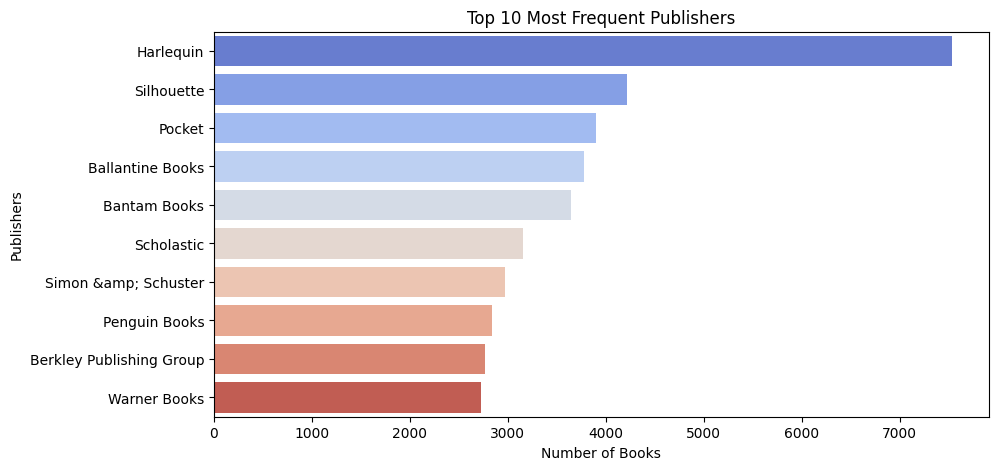

In [31]:
# Most common publishers
plt.figure(figsize=(10,5))
top_publishers = books["Publisher"].value_counts().head(10)
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette="coolwarm")
plt.title("Top 10 Most Frequent Publishers")
plt.xlabel("Number of Books")
plt.ylabel("Publishers")
plt.show()

In [32]:
pd.crosstab(books['Publisher'], columns='count').sort_values(by='count', ascending=False).head(10)

col_0,count
Publisher,
Harlequin,7535
Silhouette,4220
Pocket,3905
Ballantine Books,3783
Bantam Books,3646
Scholastic,3160
Simon &amp; Schuster,2971
Penguin Books,2844
Berkley Publishing Group,2771


In [33]:
# -------------------- Users Data Analysis --------------------

## Detailed Age Analysis

✅ Key Insights from describe()

Mean age: ~34.75 years

Std deviation: 14.43 (high variance)

Min age: 0 (likely invalid)

Max age: 244 (outlier)

Q1 (25%): 24, Q3 (75%): 44

### 🔹 Steps for Detailed EDA

Visualizing age distribution (Histogram & KDE)

Identifying outliers (Boxplot & IQR method)

Filtering out unrealistic values

Binning age groups for better understanding

Exploring correlation between age & ratings


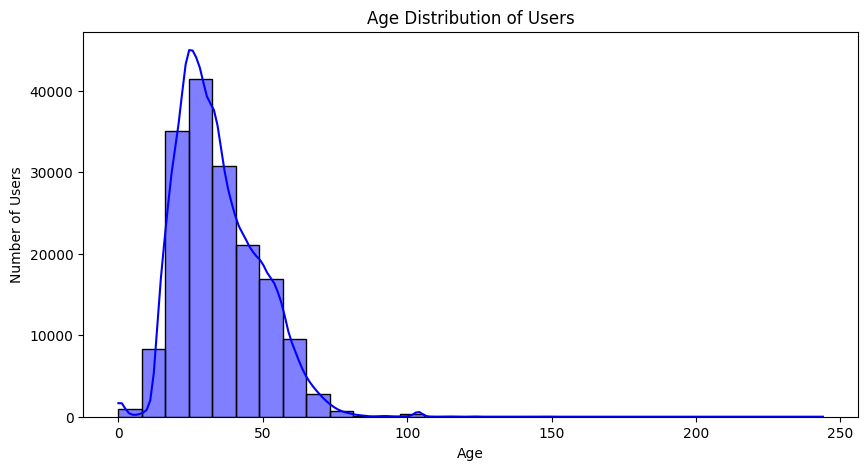

In [34]:
# Age Distribution
plt.figure(figsize=(10,5))
sns.histplot(users["Age"].dropna(), bins=30, kde=True, color="blue")
plt.title("Age Distribution of Users")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.show()

In [35]:
users['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

<!-- Outliers exist (age 0, 244) → need handling
Majority are aged 24-44 years -->

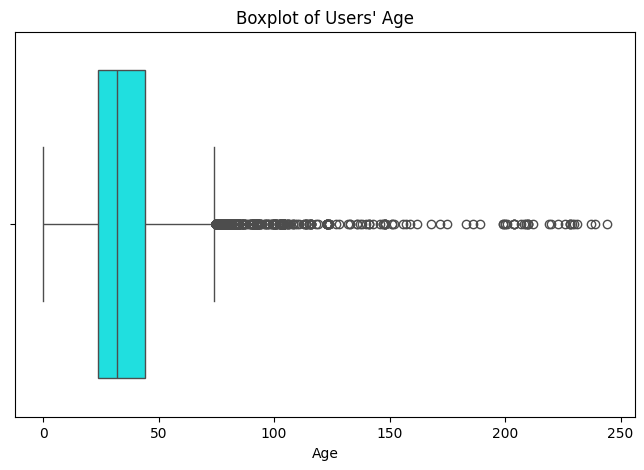

In [36]:
# 📉 Detecting Outliers (Boxplot)

plt.figure(figsize=(8,5))
sns.boxplot(x=users["Age"], color="cyan")
plt.title("Boxplot of Users' Age")
plt.xlabel("Age")
plt.show()


In [37]:
users['Age'].value_counts()

Age
24.0     5687
25.0     5618
26.0     5547
23.0     5456
27.0     5383
         ... 
168.0       1
132.0       1
159.0       1
186.0       1
127.0       1
Name: count, Length: 165, dtype: int64

In [38]:
# Age
# 24.0     5687
# 25.0     5618
# 26.0     5547
# 23.0     5456
# 27.0     5383

In [39]:
users[users['Age']>100]

,User-ID,Location,Age
1288,1289,"san jose, california, usa",103.0
1322,1323,"milano, lombardia, italy",104.0
1578,1579,"akure, ondo/nigeria, nigeria",231.0
3084,3085,"zürich, switzerland, switzerland",104.0
3210,3211,"le mesnil saint denis, yvelines, france",119.0
...,...,...,...
276047,276048,"wien, wien, austria",127.0
276352,276353,"hillsdale, new york, usa",104.0
277107,277108,"quinto, ticino, switzerland",104.0
277503,277504,"san diego, california, usa",103.0


In [40]:
# 📌 Handling Outliers (IQR Method)


Q1 = users["Age"].quantile(0.25)
Q3 = users["Age"].quantile(0.75)
IQR = Q3 - Q1

# Define valid range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtered Data
filtered_users = users[(users["Age"] > lower_bound) & (users["Age"] < upper_bound)]

print(f"Original count: {len(users)} | After filtering: {len(filtered_users)}")


Original count: 278858 | After filtering: 166842


In [41]:
Q1, Q3, IQR, lower_bound, upper_bound

(24.0, 44.0, 20.0, -6.0, 74.0)

<!-- 📌 Outlier Analysis Based on IQR Method
Given the calculated values:

Q1 (25th percentile): 24.0
Q3 (75th percentile): 44.0
IQR (Interquartile Range): 20.0 (Q3 - Q1)
Lower Bound: -6.0 (Q1 - 1.5 * IQR)
Upper Bound: 74.0 (Q3 + 1.5 * IQR)
🧐 Interpretation
Ages below -6.0 are impossible, so no lower outliers.
Ages above 74.0 are outliers, including extreme values like 244.
Valid age range: 0 to 74 years (excluding impossible ages like 244). -->


In [42]:
# 📉 Filtering Out Outliers
filtered_users = users[(users["Age"] >= 0) & (users["Age"] <= 74)]
print(f"Original Users: {len(users)}, Filtered Users: {len(filtered_users)}")

Original Users: 278858, Filtered Users: 167012


In [43]:
filtered_users['Age'].describe()

count    167012.000000
mean         34.373590
std          13.517693
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max          74.000000
Name: Age, dtype: float64

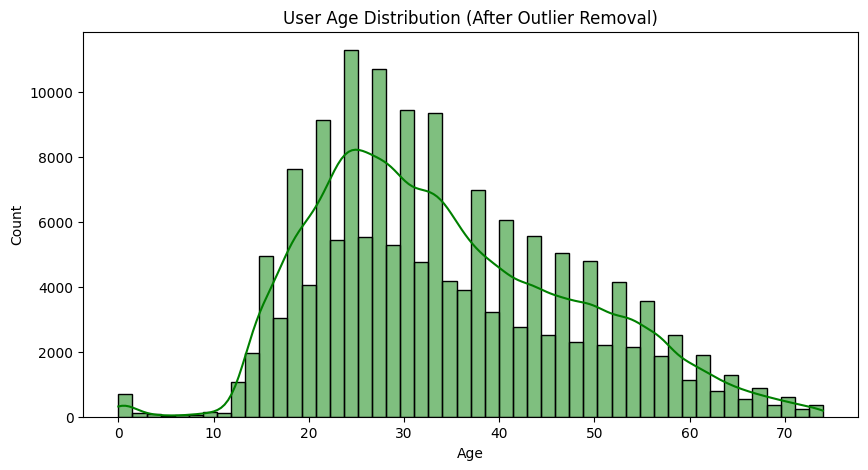

In [44]:
# 📊 Visualization of Cleaned Age Distribution

plt.figure(figsize=(10,5))
sns.histplot(filtered_users["Age"], bins=50, kde=True, color="green")
plt.title("User Age Distribution (After Outlier Removal)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


In [45]:
# 📊 Age Binning (Grouping Users)

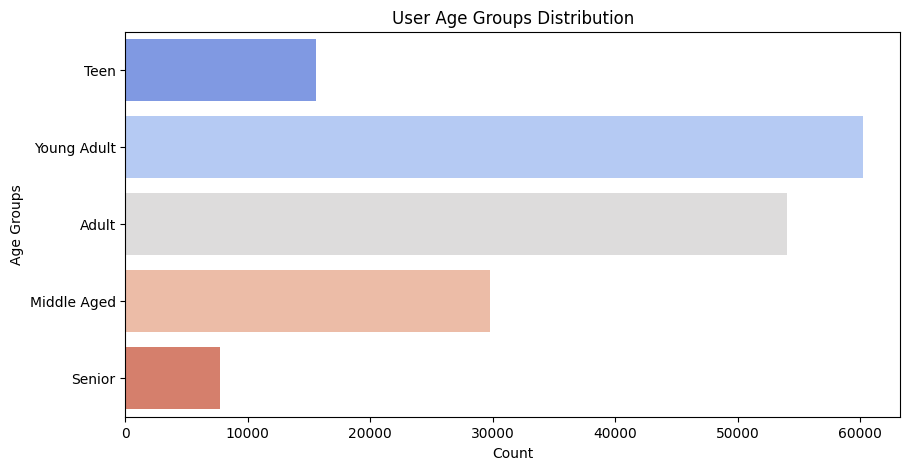

In [46]:
bins = [0, 18, 30, 45, 60, 100]  
labels = ["Teen", "Young Adult", "Adult", "Middle Aged", "Senior"]  
users["Age Group"] = pd.cut(users["Age"], bins=bins, labels=labels)

plt.figure(figsize=(10,5))
sns.countplot(y=users["Age Group"], palette="coolwarm")
plt.title("User Age Groups Distribution")
plt.xlabel("Count")
plt.ylabel("Age Groups")
plt.show()


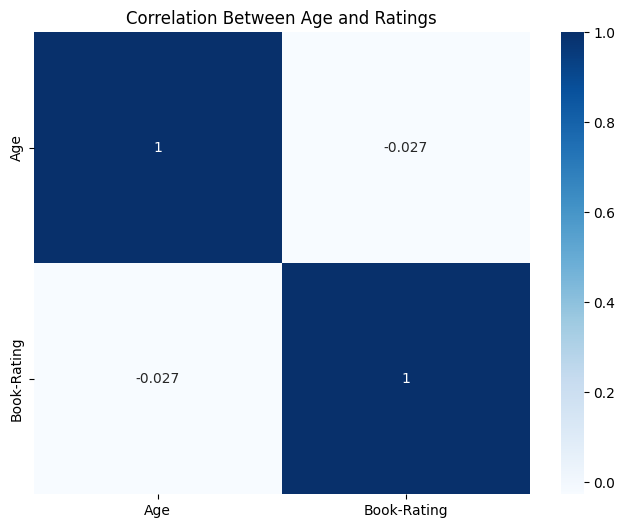

In [47]:
# 📈 Correlation Between Age & Ratings

merged_data = ratings.merge(filtered_users, on="User-ID")
plt.figure(figsize=(8,6))
sns.heatmap(merged_data[["Age", "Book-Rating"]].corr(), annot=True, cmap="Blues")
plt.title("Correlation Between Age and Ratings")
plt.show()


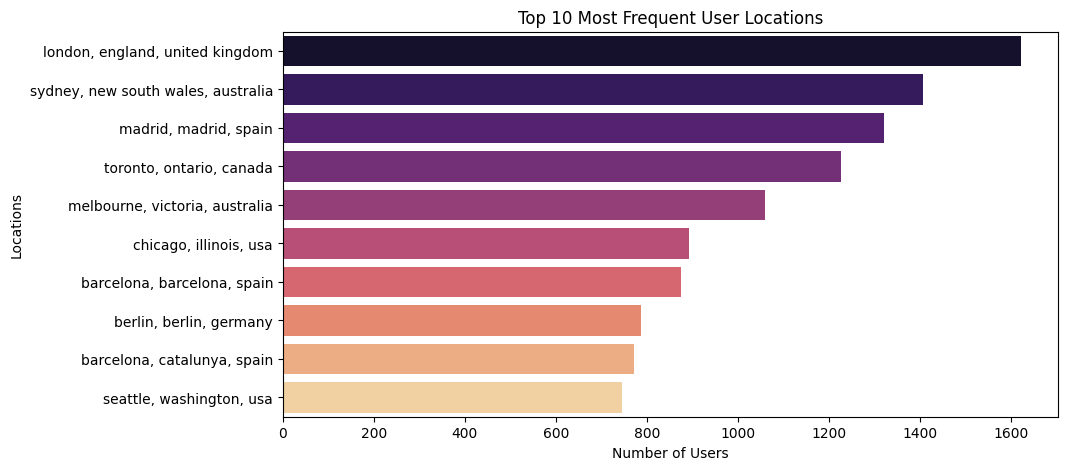

In [48]:
# Top Locations
plt.figure(figsize=(10,5))
top_locations = filtered_users["Location"].value_counts().head(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette="magma")
plt.title("Top 10 Most Frequent User Locations")
plt.xlabel("Number of Users")
plt.ylabel("Locations")
plt.show()

In [49]:
pd.crosstab(filtered_users['Location'], columns='count').sort_values(by='count', ascending=False).head(10)

col_0,count
Location,
"london, england, united kingdom",1622
"sydney, new south wales, australia",1406
"madrid, madrid, spain",1322
"toronto, ontario, canada",1226
"melbourne, victoria, australia",1059
"chicago, illinois, usa",893
"barcelona, barcelona, spain",876
"berlin, berlin, germany",787
"barcelona, catalunya, spain",772


In [50]:
# -------------------- Ratings Data Analysis --------------------

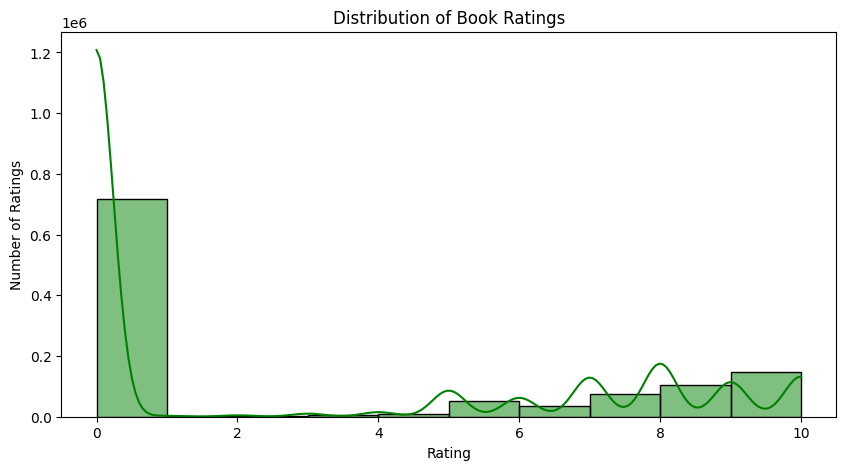

In [51]:
# Rating Distribution
plt.figure(figsize=(10,5))
sns.histplot(ratings["Book-Rating"], bins=10, kde=True, color="green")
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.show()


In [52]:
pd.crosstab(ratings['Book-Rating'], columns='count').sort_values(by='count', ascending=False)

col_0,count
Book-Rating,
0,716109
8,103736
10,78610
7,76457
9,67541
5,50974
6,36924
4,8904
3,5996


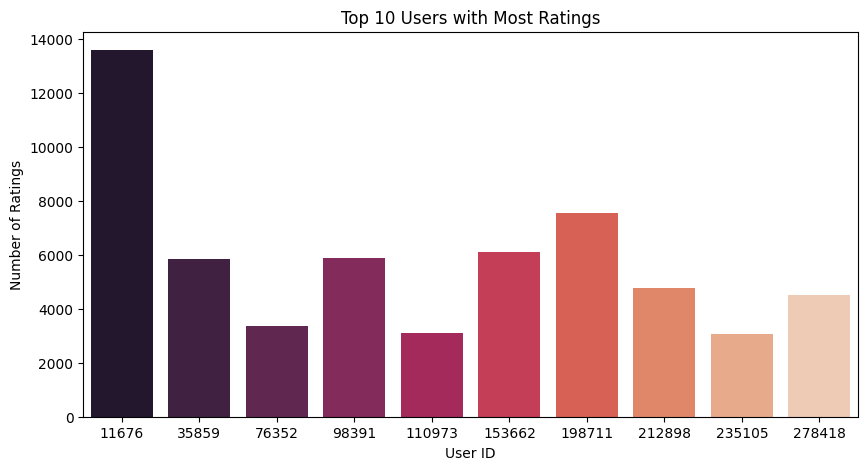

In [53]:
# Users with most ratings
plt.figure(figsize=(10,5))
top_users = ratings["User-ID"].value_counts().head(10)
sns.barplot(x=top_users.index, y=top_users.values, palette="rocket")
plt.title("Top 10 Users with Most Ratings")
plt.xlabel("User ID")
plt.ylabel("Number of Ratings")
plt.show()

In [54]:
users_with_most_ratings = pd.crosstab(ratings['User-ID'], columns='count').sort_values(by='count', ascending=False).head(10)
users_with_most_ratings

col_0,count
User-ID,
11676,13602
198711,7550
153662,6109
98391,5891
35859,5850
212898,4785
278418,4533
76352,3367
110973,3100


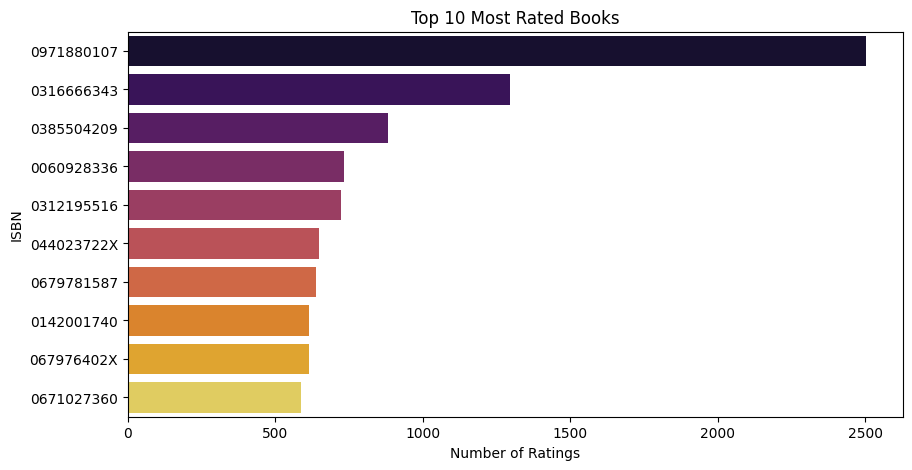

In [55]:
# Most rated books
plt.figure(figsize=(10,5))
top_books = ratings["ISBN"].value_counts().head(10)
sns.barplot(x=top_books.values, y=top_books.index, palette="inferno")
plt.title("Top 10 Most Rated Books")
plt.xlabel("Number of Ratings")
plt.ylabel("ISBN")
plt.show()

In [56]:
pd.crosstab(ratings['ISBN'], columns='count').sort_values(by='count', ascending=False).head(10)

col_0,count
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723
044023722X,647
0679781587,639
0142001740,615
067976402X,614


In [57]:
# -------------------- Merging Data & Insights --------------------

In [58]:
merged_df = ratings.merge(books, on="ISBN").merge(filtered_users, on="User-ID")

In [59]:
merged_df.shape

(748401, 12)

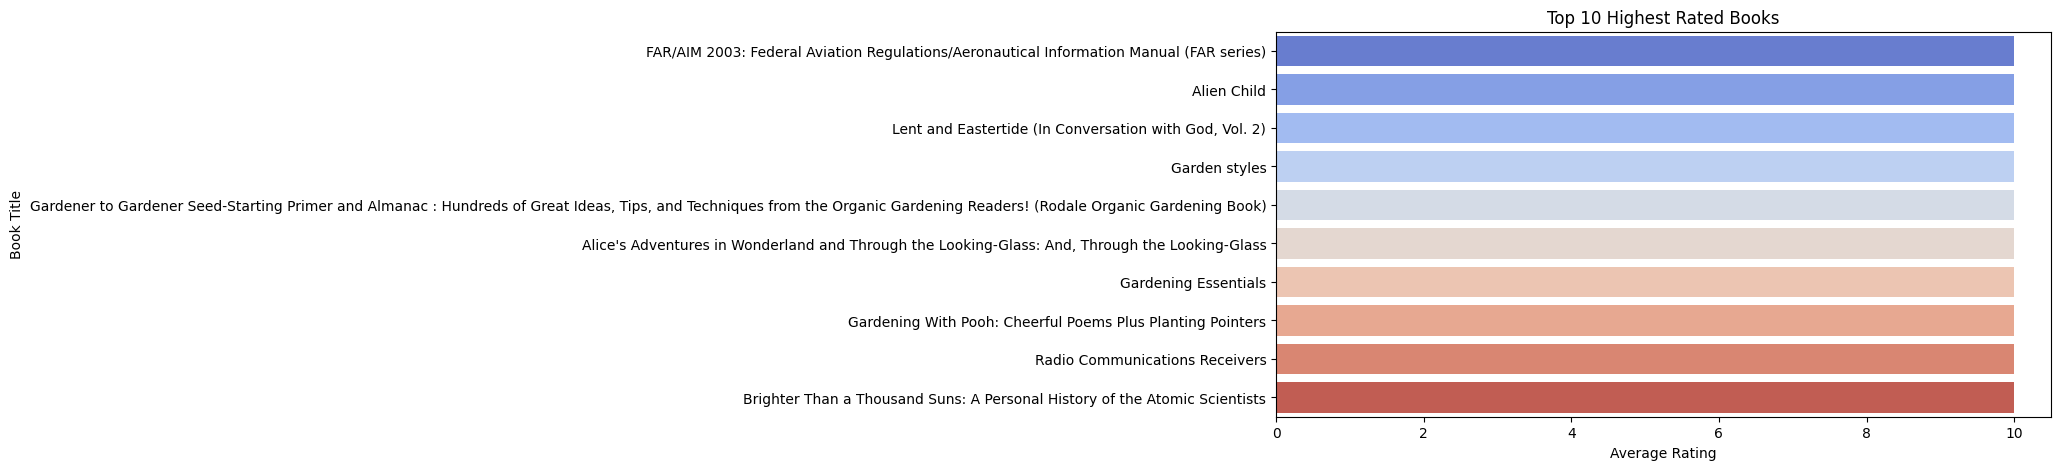

In [60]:
# Average rating per book
avg_ratings = merged_df.groupby("Book-Title")["Book-Rating"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette="coolwarm")
plt.title("Top 10 Highest Rated Books")
plt.xlabel("Average Rating")
plt.ylabel("Book Title")
plt.show()

In [61]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [62]:
# Average rating per author
avg_ratings_author = merged_df.groupby("Book-Author")["Book-Rating"].mean().sort_values(ascending=False).head(10)
avg_ratings_author


Book-Author
David V., M.D. Sheehan    10.0
IchirÃ?O. Kawasaki        10.0
Frank B. Long             10.0
Ronald Millar             10.0
Websters New World        10.0
Ian Warrell               10.0
Frank B. Gilbreth Sr.     10.0
Donald F. Tapley          10.0
Donald Engels             10.0
Jonathan Sumption         10.0
Name: Book-Rating, dtype: float64

In [63]:
# Average rating per Book
avg_ratings_book = merged_df.groupby("Book-Title")["Book-Rating"].mean().sort_values(ascending=False).head(10)
avg_ratings_book


Book-Title
FAR/AIM 2003: Federal Aviation Regulations/Aeronautical Information Manual (FAR series)                                                                                      10.0
Alien Child                                                                                                                                                                  10.0
Lent and Eastertide (In Conversation with God, Vol. 2)                                                                                                                       10.0
Garden styles                                                                                                                                                                10.0
Gardener to Gardener Seed-Starting Primer and Almanac : Hundreds of Great Ideas, Tips, and Techniques from the Organic Gardening Readers! (Rodale Organic Gardening Book)    10.0
Alice's Adventures in Wonderland and Through the Looking-Glass: And, Through the Looking-Glass     

In [64]:
# Average rating per publisher
avg_ratings_publisher = merged_df.groupby("Publisher")["Book-Rating"].mean().sort_values(ascending=False).head(10)
avg_ratings_publisher

Publisher
 Editions P. Terrail              10.0
Gateway Publishers                10.0
H H P Publishing Inc              10.0
Guilford Press                    10.0
Guild of Master Craftsman         10.0
GrÃ?Â¤fe und Unzer Verlag GmbH    10.0
Greenbook                         10.0
Greatestescapes.com               10.0
Great Explorations                10.0
Great Creations                   10.0
Name: Book-Rating, dtype: float64

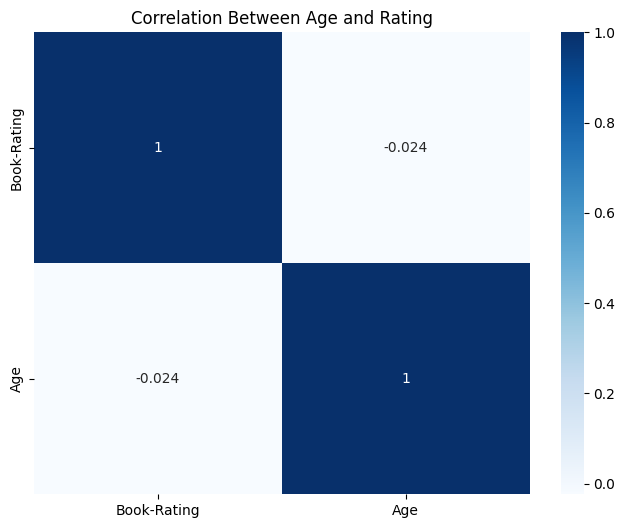

In [65]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(merged_df[["Book-Rating", "Age"]].corr(), annot=True, cmap="Blues")
plt.title("Correlation Between Age and Rating")
plt.show()


In [66]:
merged_df.select_dtypes(include='number').corr()

,User-ID,Book-Rating,Age
User-ID,1.000000,-0.029668,-0.009606
Book-Rating,-0.029668,1.000000,-0.023745
Age,-0.009606,-0.023745,1.000000


In [67]:
filtered_users.shape

(167012, 3)

In [68]:
ratings.shape

(1149780, 3)

# Popularity Based Recommendation System

In [69]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [70]:
books.shape

(271353, 8)

In [71]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [72]:
ratings.shape

(1149780, 3)

In [73]:
ratings_with_names = ratings.merge(books, on='ISBN')
ratings_with_names

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1031123,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...
1031124,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1031125,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1031126,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


In [74]:
# ratings_with_names.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending=False).head(10)

In [75]:
num_rating_df = ratings_with_names.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating': 'num_ratings'}, inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241060,Ã?Â?lpiraten.,2
241061,Ã?Â?rger mit Produkt X. Roman.,4
241062,Ã?Â?sterlich leben.,1
241063,Ã?Â?stlich der Berge.,3


In [76]:
print(ratings_with_names['Book-Rating'].isnull().sum())


0


In [77]:
avg_rating_df = ratings_with_names.groupby('Book-Title').agg({'Book-Rating': 'mean'}).reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241060,Ã?Â?lpiraten.,0.000000
241061,Ã?Â?rger mit Produkt X. Roman.,5.250000
241062,Ã?Â?sterlich leben.,7.000000
241063,Ã?Â?stlich der Berge.,2.666667


In [78]:
# merging count and avg columns

popular_df = num_rating_df.merge(avg_rating_df, on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241060,Ã?Â?lpiraten.,2,0.000000
241061,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241062,Ã?Â?sterlich leben.,1,7.000000
241063,Ã?Â?stlich der Berge.,3,2.666667


In [79]:
popular_df = popular_df[popular_df['num_ratings'] >= 250]
popular_df = popular_df.sort_values(by='avg_rating', ascending=False).head(50)
popular_df

,Book-Title,num_ratings,avg_rating
80431,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80419,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80438,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80423,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80411,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191607,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187372,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80442,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211379,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219736,To Kill a Mockingbird,510,4.700000


In [80]:
ratings_with_names

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1031123,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...
1031124,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1031125,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1031126,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


In [81]:
popular_df = popular_df.merge(books, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title', 'Book-Author', 'Image-URL-M', 'avg_rating', 'num_ratings']]
popular_df

,Book-Title,Book-Author,Image-URL-M,avg_rating,num_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,5.852804,428
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,5.824289,387
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,5.737410,278
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,5.501441,347
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,5.183453,556
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,5.007117,281
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,4.948370,368
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,4.895652,575
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,4.880769,260
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,4.700000,510


In [82]:
################# completed Popularity Based Recommendation System ####################

# same thing but in a different way

In [83]:
# # 📌 Step 1: Aggregate Ratings Per Book

# book_ratings = ratings_with_names.groupby('Book-Title').count()['Book-Rating'].reset_index()
# book_ratings = book_ratings.rename(columns={'Book-Rating': 'Total-Ratings'})
# book_ratings

In [84]:
# book_ratings.shape

In [85]:
# # 📌 Step 2: Filter Books with ≥ 250 Ratings
# popular_books = book_ratings[book_ratings['Total-Ratings'] >= 250]
# popular_books = popular_books.sort_values(by='Total-Ratings', ascending=False)


In [86]:
# print(popular_books)


In [87]:
# a total of 186 books having 250 or more ratings.

In [88]:
###########################################################

# Collaborative Based Filtering

In [89]:
# we need books with atleast 50 ratings
# we need users who has rated atleast 200 books

In [90]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [91]:
ratings_with_names = ratings.merge(books, on='ISBN')
ratings_with_names

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1031123,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...
1031124,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1031125,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1031126,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


In [92]:
x = ratings_with_names.groupby('User-ID').count()['Book-Rating'] > 200
padhe_likhe_users = x[x].index
padhe_likhe_users

Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,   6323,
         6543,
       ...
       271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427, 277639,
       278418],
      dtype='int64', name='User-ID', length=811)

In [93]:
filtered_rating = ratings_with_names[ratings_with_names['User-ID'].isin(padhe_likhe_users)]
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1151,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...
1152,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...
1153,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...
1154,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...
...,...,...,...,...,...,...,...,...,...,...
1029349,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...
1029350,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.0...,http://images.amazon.com/images/P/3411086211.0...,http://images.amazon.com/images/P/3411086211.0...
1029351,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,http://images.amazon.com/images/P/3829021860.0...,http://images.amazon.com/images/P/3829021860.0...,http://images.amazon.com/images/P/3829021860.0...
1029352,275970,4770019572,0,Musashi,Eiji Yoshikawa,1995,Kodansha International (JPN),http://images.amazon.com/images/P/4770019572.0...,http://images.amazon.com/images/P/4770019572.0...,http://images.amazon.com/images/P/4770019572.0...


In [94]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books = y[y].index
famous_books
famous_books.shape

(706,)

In [95]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]
final_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1163,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
1165,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
1168,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...
1174,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...
...,...,...,...,...,...,...,...,...,...,...
1029188,275970,1400031354,0,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...
1029189,275970,1400031362,0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...
1029262,275970,1573229725,0,Fingersmith,Sarah Waters,2002,Riverhead Books,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...
1029301,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...


In [96]:
pt = final_ratings.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [97]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [98]:
pt.fillna(0, inplace=True)

In [99]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
# Similarity Scores

In [101]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(pt)
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [102]:
similarity_scores.shape

(706, 706)

In [103]:
index = np.where(pt.index=='Zoya')[0][0]
index

704

In [104]:
distances = similarity_scores[index]
distances

array([0.07347567, 0.16773875, 0.04938579, 0.        , 0.11284126,
       0.11224972, 0.1536172 , 0.07070243, 0.13194105, 0.0879174 ,
       0.09394598, 0.        , 0.0722577 , 0.08751563, 0.19013896,
       0.08838835, 0.13847624, 0.0493197 , 0.10184887, 0.06381997,
       0.12381007, 0.        , 0.12535646, 0.08885599, 0.13360872,
       0.        , 0.05969674, 0.06236096, 0.16039401, 0.06786258,
       0.03106883, 0.05959444, 0.        , 0.30199543, 0.        ,
       0.14389473, 0.04492721, 0.22358045, 0.10559799, 0.19520018,
       0.        , 0.0803096 , 0.03598302, 0.04895763, 0.05785163,
       0.17427718, 0.        , 0.07634573, 0.09451121, 0.11624778,
       0.09408918, 0.10399847, 0.        , 0.10328147, 0.0777027 ,
       0.        , 0.1270828 , 0.02257064, 0.13786105, 0.05758289,
       0.07193131, 0.        , 0.05018676, 0.32252503, 0.        ,
       0.0840875 , 0.07884165, 0.        , 0.10081854, 0.02776016,
       0.        , 0.        , 0.13552619, 0.02218391, 0.08678

In [105]:
sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:51]

[(194, 0.6188332046777835),
 (424, 0.5423917439488084),
 (288, 0.4536936187776783),
 (175, 0.43416881684252095),
 (196, 0.43104197190280946),
 (321, 0.40945200348898914),
 (235, 0.39451749280409243),
 (212, 0.3556682708976181),
 (356, 0.3292129047941825),
 (671, 0.3233951698342059),
 (330, 0.3229054247736314),
 (63, 0.32252502781198583),
 (566, 0.31419542595265226),
 (33, 0.30199542705413734),
 (129, 0.30166404057619955),
 (353, 0.2941407608652377),
 (177, 0.2938135633299163),
 (663, 0.2871636748207964),
 (510, 0.2782620031351007),
 (303, 0.2744181547661375),
 (592, 0.27120739082755474),
 (607, 0.2710388437204866),
 (125, 0.2704043079213041),
 (472, 0.2537576090465499),
 (171, 0.2532944218850154),
 (659, 0.24887298354333667),
 (385, 0.24218082940027133),
 (380, 0.24146414164659924),
 (87, 0.23464769086018092),
 (331, 0.23075163170128504),
 (662, 0.23011971393671765),
 (396, 0.22681617718163868),
 (462, 0.22532595318012916),
 (37, 0.22358044597056817),
 (138, 0.21780586075373165),
 (148

In [106]:
# def recommend(book):
#     book_index = final_ratings[final_ratings['Book-Title'] == book].index[0]
#     print(book_index)
#     book_list = sorted(list(enumerate(similarity_scores[book_index])), reverse=True, key=lambda x: x[1])[1:6]
#     print(book_list)
#     # for i in book_list:
#     #     print(final_ratings.iloc[i[0]]['Book-Title'])

In [137]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    distances = similarity_scores[index]
    similar_items = sorted(list(enumerate(distances)), key=lambda x: x[1], reverse=True)[1:6]

    suggestions = []
    for item in similar_items:
        suggestion = pt.index[item[0]]
        suggestions.append(suggestion)
    return suggestions

In [138]:
recommend('Zoya')

['Fine Things', 'Secrets', 'Kaleidoscope', 'Exclusive', 'Five Days in Paris']

In [144]:
recommend('Zoya')

[[10643    Fine Things
  Name: Book-Title, dtype: object,
  10643    Danielle Steel
  Name: Book-Author, dtype: object,
  10643    http://images.amazon.com/images/P/0440200563.0...
  Name: Image-URL-M, dtype: object],
 [12328    Secrets
  Name: Book-Title, dtype: object,
  12328    DANIELLE STEEL
  Name: Book-Author, dtype: object,
  12328    http://images.amazon.com/images/P/0440176484.0...
  Name: Image-URL-M, dtype: object],
 [2180    Kaleidoscope
  Name: Book-Title, dtype: object,
  2180    June Stepansky
  Name: Book-Author, dtype: object,
  2180    http://images.amazon.com/images/P/0884092097.0...
  Name: Image-URL-M, dtype: object],
 [19148    Exclusive
  Name: Book-Title, dtype: object,
  19148    Sandra Brown
  Name: Book-Author, dtype: object,
  19148    http://images.amazon.com/images/P/0446604232.0...
  Name: Image-URL-M, dtype: object],
 [9500    Five Days in Paris
  Name: Book-Title, dtype: object,
  9500    DANIELLE STEEL
  Name: Book-Author, dtype: object,
  9500    htt

In [109]:
pt.index[194]

'Fine Things'

In [110]:
np.where(pt.index=='Zoya')[0][0]

704

In [111]:
final_ratings['Image-URL-M'].iloc[194]

'http://images.amazon.com/images/P/0440220602.01.MZZZZZZZ.jpg'

In [112]:
popular_df

,Book-Title,Book-Author,Image-URL-M,avg_rating,num_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,5.852804,428
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,5.824289,387
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,5.737410,278
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,5.501441,347
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,5.183453,556
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,5.007117,281
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,4.948370,368
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,4.895652,575
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,4.880769,260
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,4.700000,510


In [113]:
import compress_pickle



In [114]:
import compress_pickle

# Compress files before uploading
compress_pickle.dump(popular_df, "model.pkl.gz", compression="gzip")

In [115]:
# compress_pickle.dump(similarity, "similarity.pkl.gz", compression="gzip")

In [116]:
popular_df

,Book-Title,Book-Author,Image-URL-M,avg_rating,num_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,5.852804,428
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,5.824289,387
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,5.737410,278
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,5.501441,347
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,5.183453,556
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,5.007117,281
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,4.948370,368
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,4.895652,575
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,4.880769,260
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,4.700000,510


In [117]:
list(popular_df['Book-Author'].values)

['J. K. Rowling',
 'J. K. Rowling',
 'J. K. Rowling',
 'J. K. Rowling',
 'J. K. Rowling',
 'J.R.R. TOLKIEN',
 'J.R.R. TOLKIEN',
 'J. K. Rowling',
 'J.R.R. TOLKIEN',
 'Harper Lee',
 'Dan Brown',
 'Mitch Albom',
 'J.D. Salinger',
 'Alice Sebold',
 'George Orwell',
 'Barbara Kingsolver',
 'Neil Gaiman',
 'Sue Monk Kidd',
 'Michael Moore',
 'MITCH ALBOM',
 'Anita Diamant',
 'Douglas Adams',
 'Barbara Ehrenreich',
 'Jon Krakauer',
 'Ray Bradbury',
 'Tracy Chevalier',
 'DIANA GABALDON',
 'Billie Letts',
 'LAURA HILLENBRAND',
 'Yann Martel',
 'Barbara Kingsolver',
 'Dave Pelzer',
 'Frank McCourt',
 'Jennifer Weiner',
 'Eric Schlosser',
 'Neil Gaiman',
 'JOHN GRISHAM',
 'Tim Lahaye',
 'PHILIP PULLMAN',
 'Alice Walker',
 'Thomas Harris',
 'Nick Hornby',
 'Janet Evanovich',
 'Paulo Coelho',
 'Janet Evanovich',
 'James Patterson',
 'William Gerald Golding',
 'John Irving',
 'ANNE RICE',
 'Janet Fitch']

In [118]:
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [119]:
import compress_pickle

# Compress files before uploading
compress_pickle.dump(similarity_scores, "similarity.pkl.gz", compression="gzip")

In [120]:
pt = final_ratings.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [121]:
import compress_pickle

# Compress files before uploading
compress_pickle.dump(pt, "pt.pkl.gz", compression="gzip")

In [125]:
popular_df

,Book-Title,Book-Author,Image-URL-M,avg_rating,num_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,5.852804,428
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,5.824289,387
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,5.737410,278
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,5.501441,347
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,5.183453,556
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,5.007117,281
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,4.948370,368
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,4.895652,575
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,4.880769,260
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,4.700000,510


In [122]:
import numpy as np

In [147]:
pt.index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=706)

In [149]:
np.where(pt.index=='Zoya')[0][0]

704

In [163]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    distances = similarity_scores[index]
    similar_items = sorted(list(enumerate(distances)), key=lambda x: x[1], reverse=True)[1:6]

    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        data.append(item)
    return data

In [164]:
recommend('Zoya')

[['Fine Things',
  'Danielle Steel',
  'http://images.amazon.com/images/P/0440200563.01.MZZZZZZZ.jpg'],
 ['Secrets',
  'DANIELLE STEEL',
  'http://images.amazon.com/images/P/0440176484.01.MZZZZZZZ.jpg'],
 ['Kaleidoscope',
  'June Stepansky',
  'http://images.amazon.com/images/P/0884092097.01.MZZZZZZZ.jpg'],
 ['Exclusive',
  'Sandra Brown',
  'http://images.amazon.com/images/P/0446604232.01.MZZZZZZZ.jpg'],
 ['Five Days in Paris',
  'DANIELLE STEEL',
  'http://images.amazon.com/images/P/0440222842.01.MZZZZZZZ.jpg']]

In [165]:
import compress_pickle

# Compress files before uploading
compress_pickle.dump(books, "books.pkl.gz", compression="gzip")